TODO:
- Fill missing data
- Any Year Features should not be normalized???
- Remove features that don't have even distributions of data

In [1]:
import pandas as pd

In [2]:
raw = pd.read_csv('train.csv')
raw['Train'] = True
n_train_samples = len(raw)

raw = raw.append(pd.read_csv('test.csv'))
raw.loc[raw.Train != True, 'Train'] = False
print(len(raw))

2919


### Make Null Values Non-Ambiguous

In [3]:
for col in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageQual','GarageFinish','GarageType','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType']:
    raw.loc[raw[col].isnull(), col] = 'None' # col: nan = No 'col' Feature
    
raw.loc[raw['LotFrontage'].isnull(), 'LotFrontage'] = 0.0
raw.loc[raw['MasVnrArea'].isnull(), 'MasVnrArea'] = 0.0

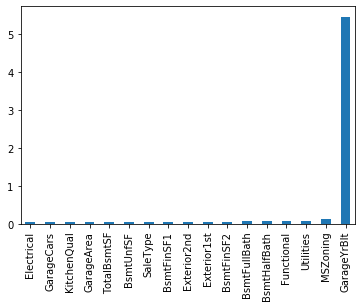

In [4]:
missing = raw.loc[:, raw.columns != 'SalePrice'].isnull().sum()
missing = missing[missing > 0]
missing = missing*100/len(raw) # As percent of data
missing.sort_values(inplace=True)
missing.plot.bar()

In [5]:
raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,208500.0,True
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,181500.0,True
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,223500.0,True
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,140000.0,True
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,250000.0,True


In [6]:
raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
raw.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Train             object
Length: 82, dtype: object

In [8]:
def get_features(raw, ignore=None):
    if not(ignore):
        ignore = []
        
    cf = [] # continuous feature columns
    cf_null = []
    df = [] # categorical feature columns

    for col in raw.columns:
        if col not in ignore:
            if len(set(raw[col].values)) > 25:
                if not(raw[col].isnull().any()):
                    cf += [col]
                else:
                    cf_null += [col]
            else:
                if raw[col].isnull().any():
                    raw.loc[raw[col].isnull(), col] = 'null'
                df += [col]
    return cf, cf_null, df

In [9]:
id_cols = ['Id']
label_cols = ['SalePrice']

cont_feature_cols, cont_f_null_cols, dis_feature_cols = get_features(raw, ignore=id_cols+label_cols)

In [10]:
dis_f_null_cols = []
for c in cont_f_null_cols:
    cont_feature_cols += [c]
    dis_f_null_cols += [c+'_null']
    raw[c+'_null'] = raw[c].isnull().astype(int)
    raw.loc[raw[c].isnull(), c] = 0

### Continuous Features

Number of Values:  129


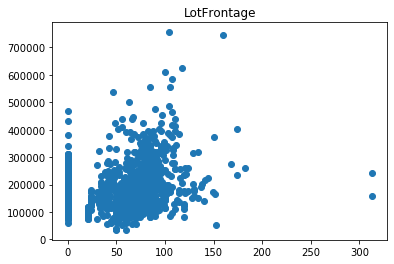

Number of Values:  1951


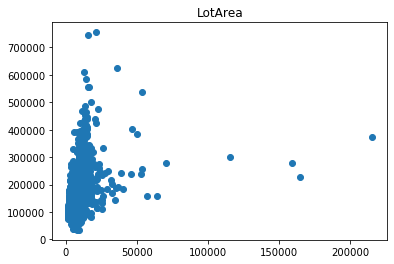

Number of Values:  118


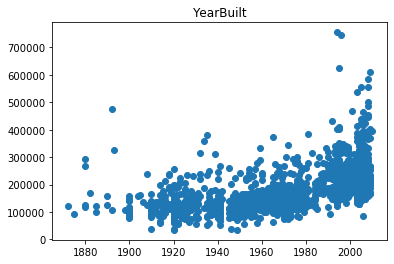

Number of Values:  61


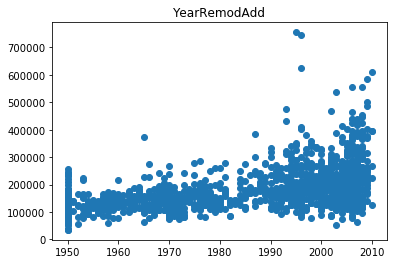

Number of Values:  444


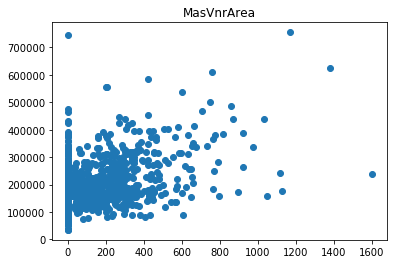

Number of Values:  1083


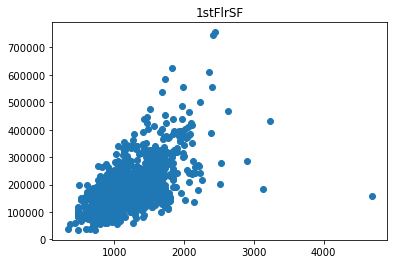

Number of Values:  635


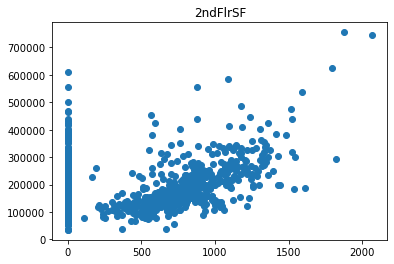

Number of Values:  36


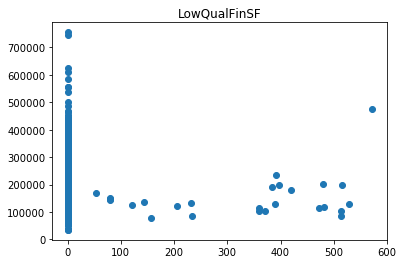

Number of Values:  1292


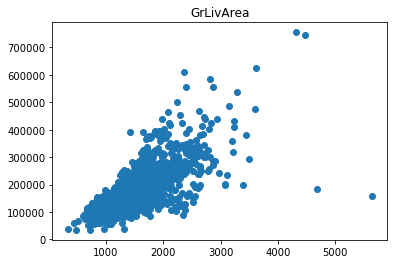

Number of Values:  379


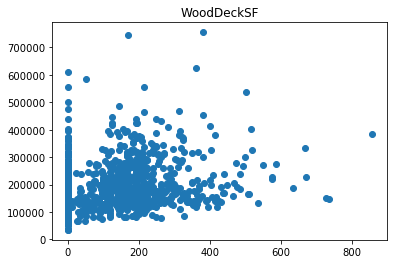

Number of Values:  252


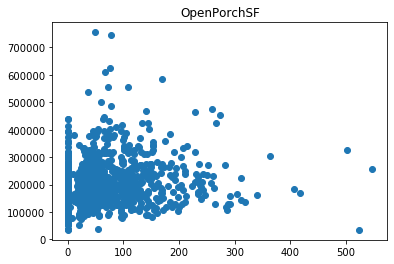

Number of Values:  183


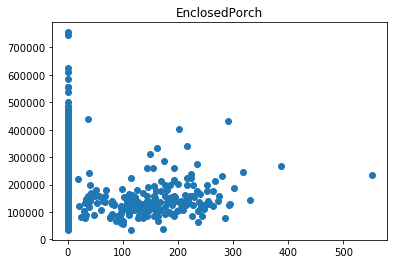

Number of Values:  31


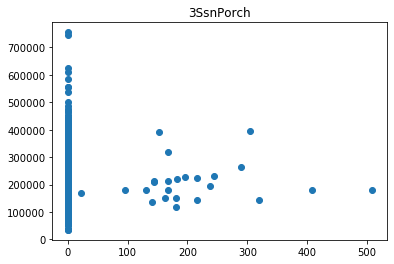

Number of Values:  121


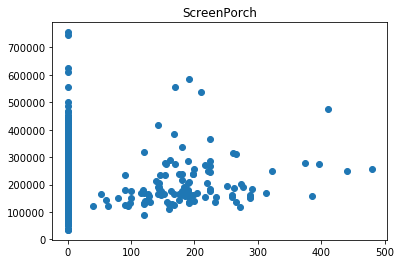

Number of Values:  38


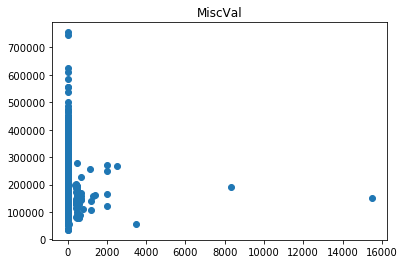

Number of Values:  991


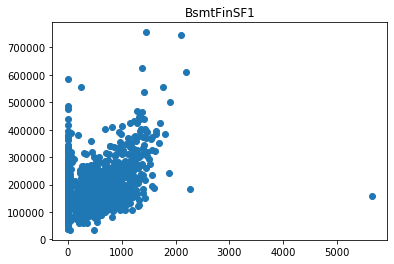

Number of Values:  272


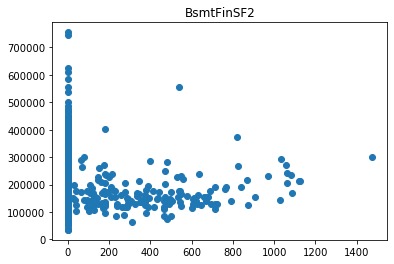

Number of Values:  1135


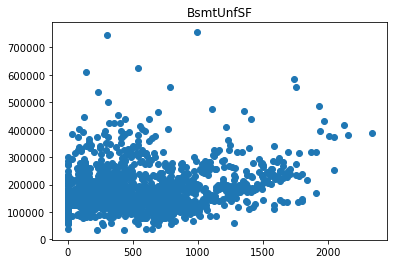

Number of Values:  1058


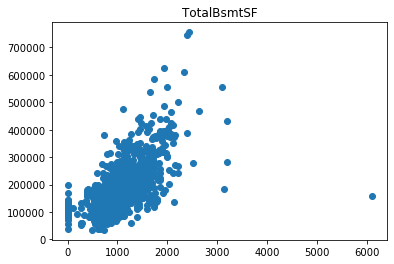

Number of Values:  104


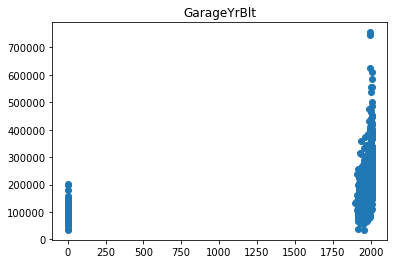

Number of Values:  603


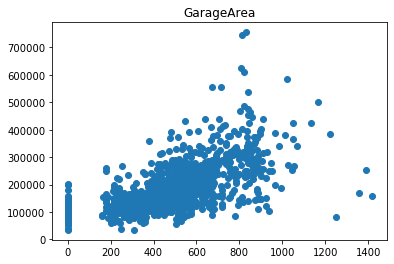

In [11]:
import matplotlib.pyplot as plt

for col in cont_feature_cols:
    try:
        print('Number of Values: ', len(set(raw[col].values)))
        plt.figure()
        plt.scatter(raw[col].values, raw['SalePrice'])
        plt.title(str(col))
        plt.show()
    except:
        print('Couldnt plot', col)

### Categorical Features

Number of Values:  16


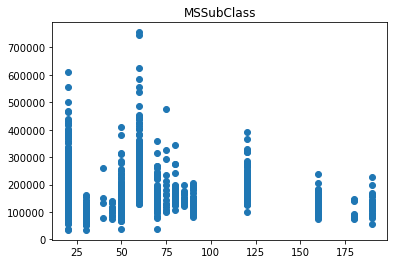

Number of Values:  6


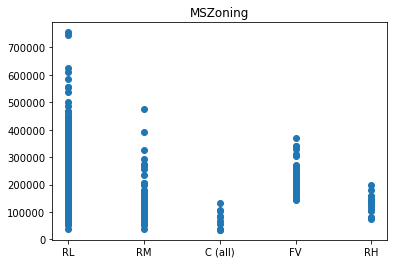

Number of Values:  2


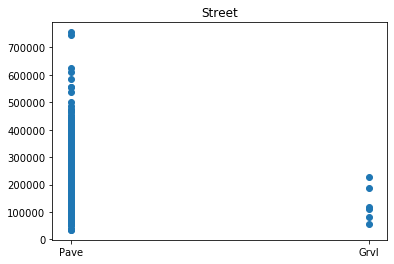

Number of Values:  3


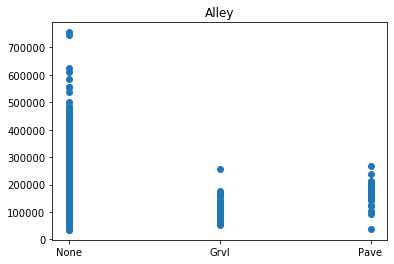

Number of Values:  4


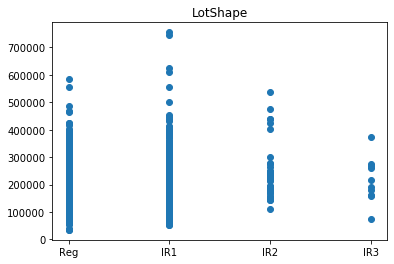

Number of Values:  4


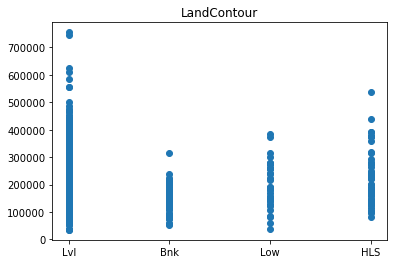

Number of Values:  3


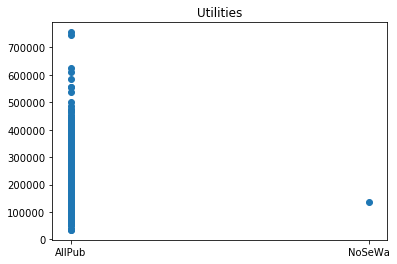

Number of Values:  5


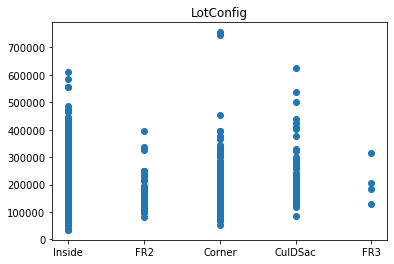

Number of Values:  3


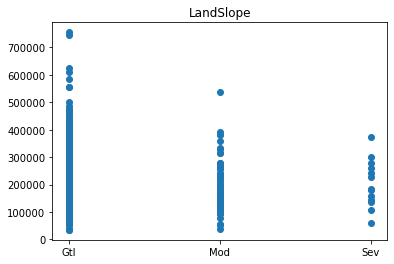

Number of Values:  25


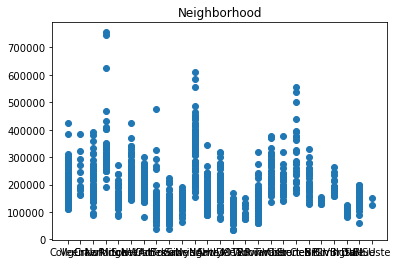

Number of Values:  9


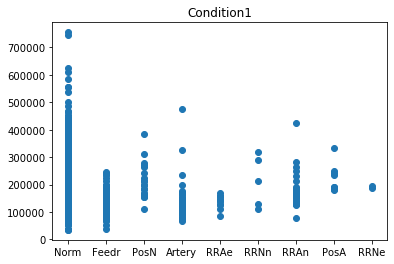

Number of Values:  8


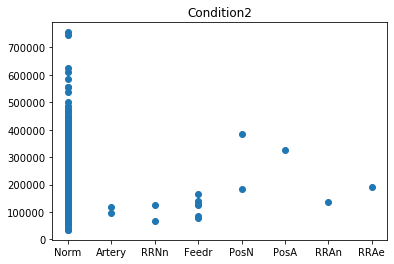

Number of Values:  5


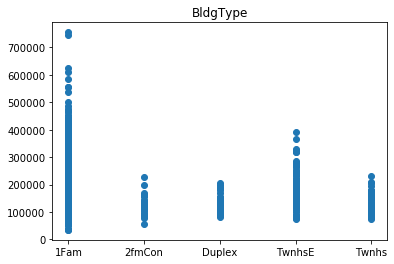

Number of Values:  8


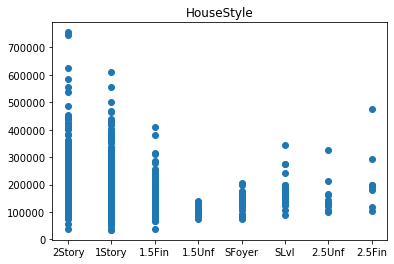

Number of Values:  10


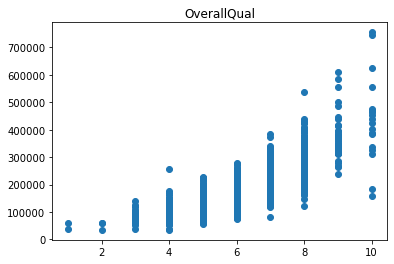

Number of Values:  9


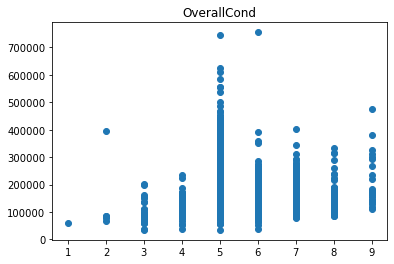

Number of Values:  6


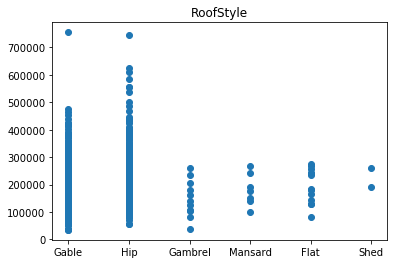

Number of Values:  8


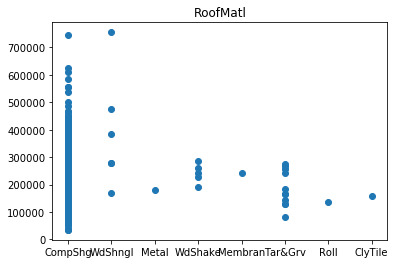

Number of Values:  16


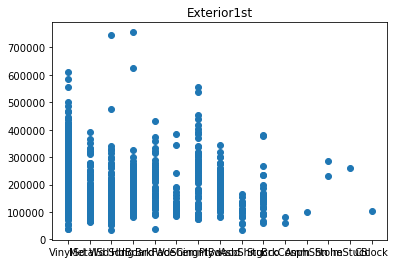

Number of Values:  17


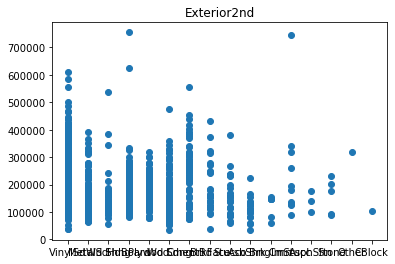

Number of Values:  4


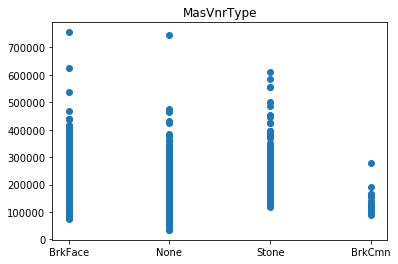

Number of Values:  4


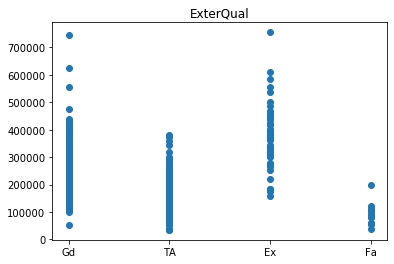

Number of Values:  5


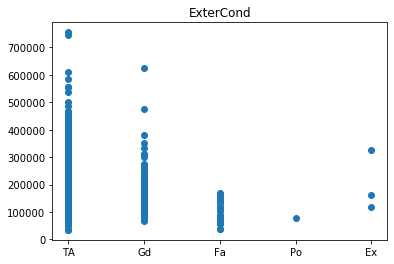

Number of Values:  6


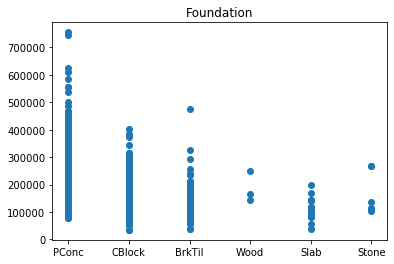

Number of Values:  5


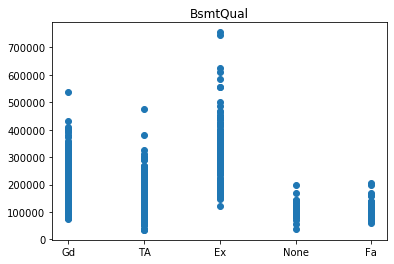

Number of Values:  5


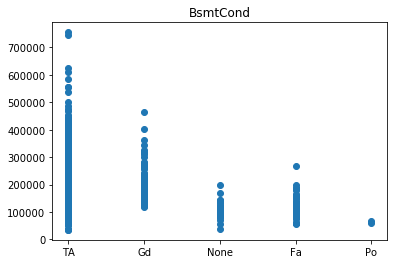

Number of Values:  5


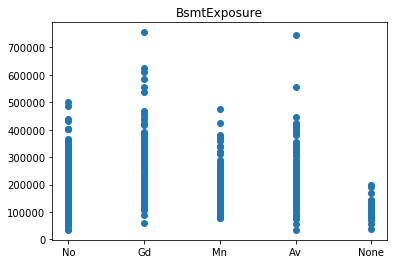

Number of Values:  7


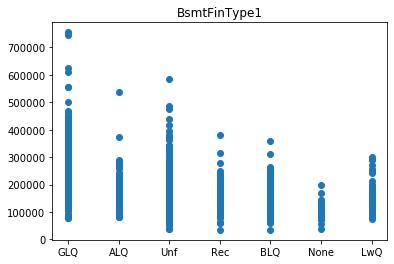

Number of Values:  7


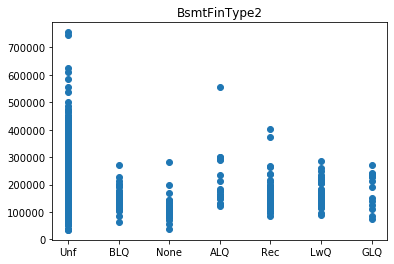

Number of Values:  6


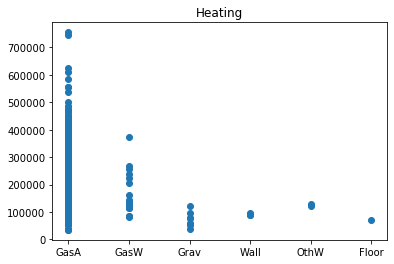

Number of Values:  5


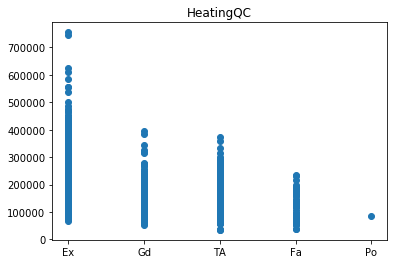

Number of Values:  2


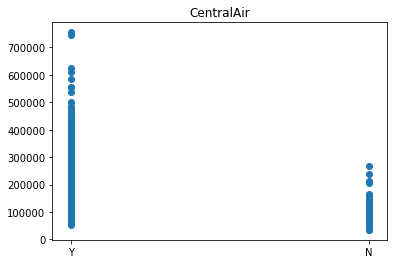

Number of Values:  6


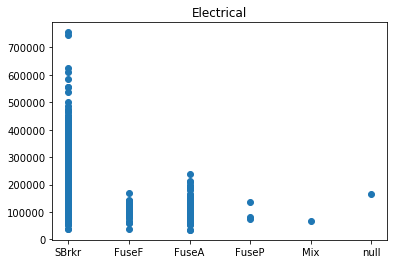

Number of Values:  5
Couldnt plot BsmtFullBath
Number of Values:  4
Couldnt plot BsmtHalfBath
Number of Values:  5


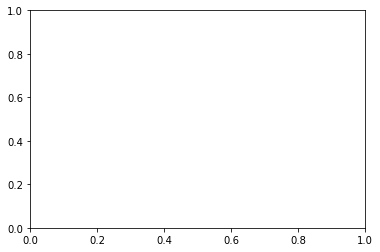

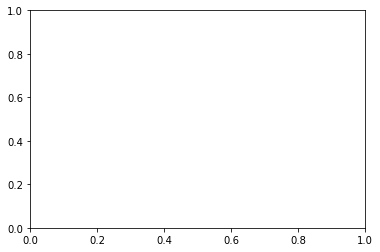

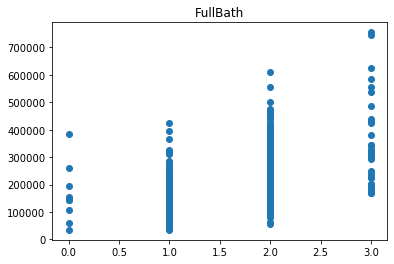

Number of Values:  3


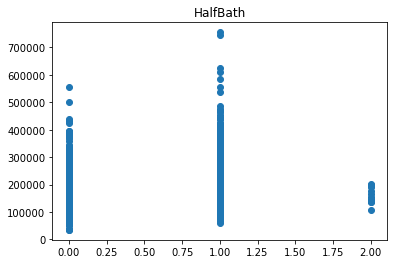

Number of Values:  8


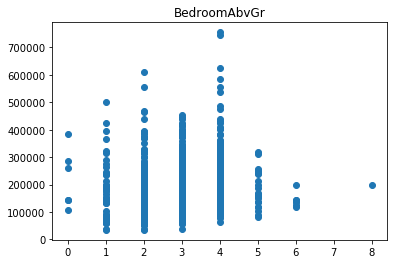

Number of Values:  4


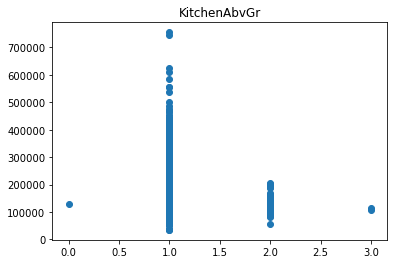

Number of Values:  5


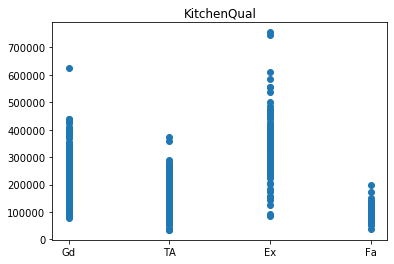

Number of Values:  14


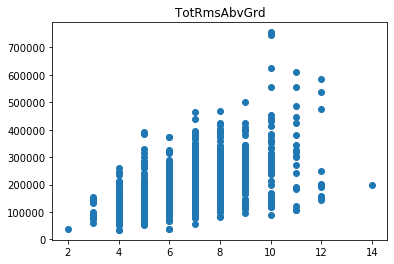

Number of Values:  8


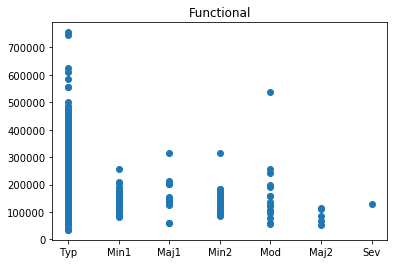

Number of Values:  5


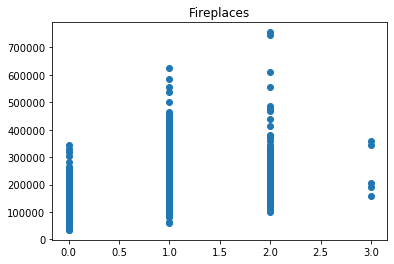

Number of Values:  6


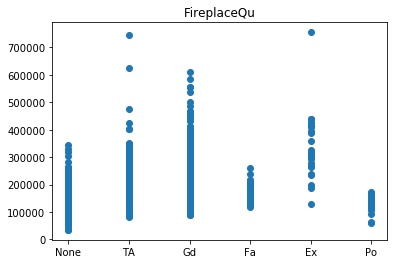

Number of Values:  7


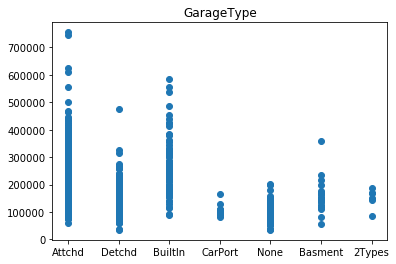

Number of Values:  4


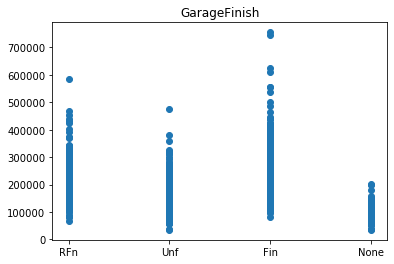

Number of Values:  7
Couldnt plot GarageCars
Number of Values:  6


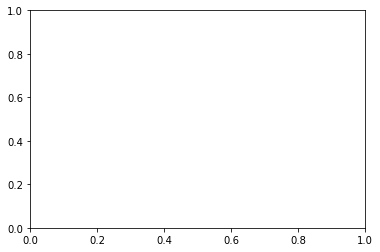

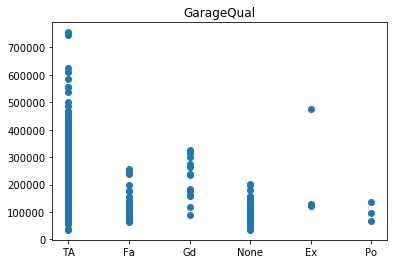

Number of Values:  6


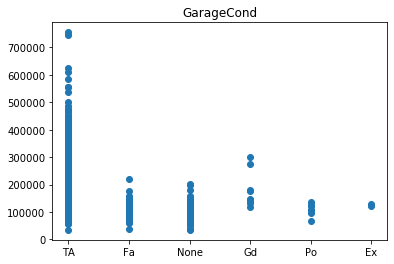

Number of Values:  3


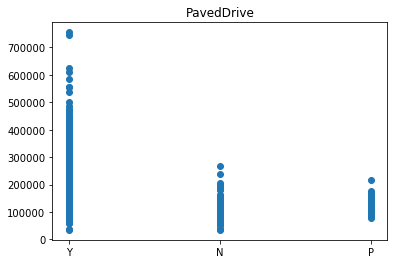

Number of Values:  14


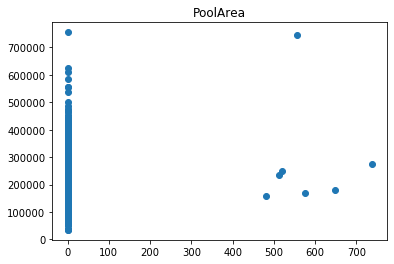

Number of Values:  4


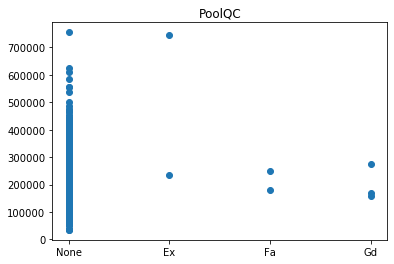

Number of Values:  5


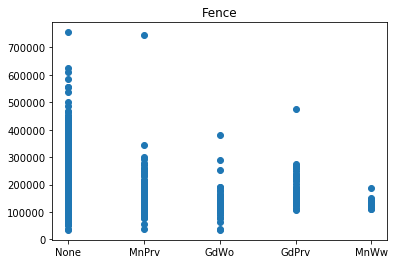

Number of Values:  5


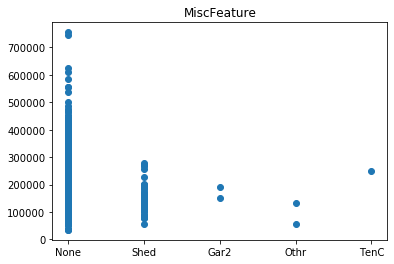

Number of Values:  12


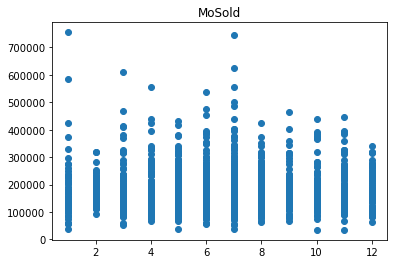

Number of Values:  5


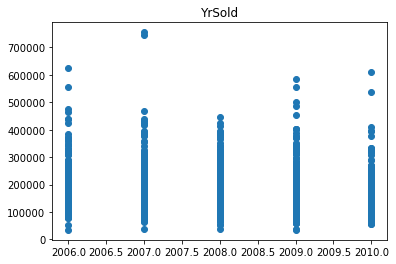

Number of Values:  10


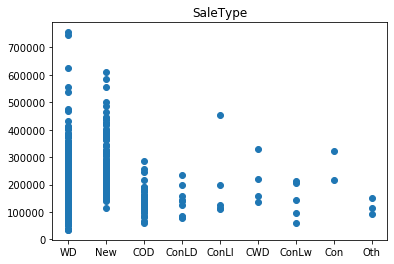

Number of Values:  6


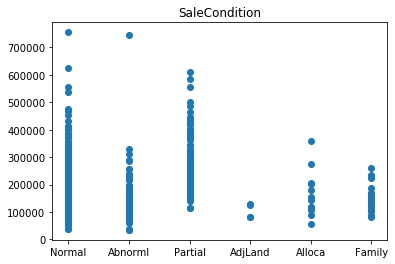

Number of Values:  2


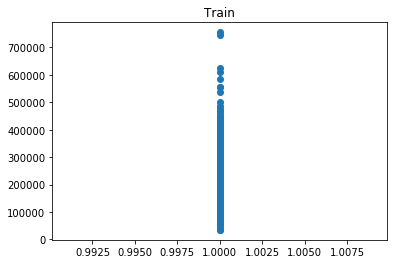

In [12]:
for col in dis_feature_cols:
    try:
        print('Number of Values: ', len(set(raw[col].values)))
        plt.figure()
        plt.scatter(raw[col].values, raw['SalePrice'])
        plt.title(str(col))
        plt.show()
    except:
        print('Couldnt plot', col)

In [13]:
print(dis_feature_cols)
print()

print(cont_feature_cols)

n_features_cont = len(cont_feature_cols) # Number of Continuous Features
n_features_dis = len(dis_feature_cols) # Number of Categorical Features
n_features = n_features_cont + n_features_dis
n_labels = len(label_cols)

raw_features = raw.loc[:, id_cols+label_cols+cont_feature_cols+dis_feature_cols+dis_f_null_cols]

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Train']

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Misc

### One Hot Encode Categorical Features

In [14]:
from collections import Counter

for col in dis_feature_cols:
    cnt = Counter(raw_features.loc[raw_features.Train == True, col].values) # Category item count
    pct = {k:100*v/n_train_samples for k, v in cnt.items() if k != 'null'} # Percent Breakdown Per Category
    keep = {k: v for k, v in pct.items() if v >= 5} # Categories to Keep. Keep if Greater Than 5%
    
    one_hot = pd.get_dummies(raw_features[col])
    for c in keep.keys():
        raw_features[col+'_'+str(c)] = one_hot[c]
    raw_features = raw_features.drop(col, axis=1)

In [15]:
len(raw_features.columns)

186

In [16]:
raw_features.loc[:, raw_features.columns]

,Id,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,...,YrSold_2007,YrSold_2006,YrSold_2009,YrSold_2010,SaleType_WD,SaleType_New,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,Train_True
0,1,208500.0,65.0,8450,2003,2003,196.0,856,854,0,...,0,0,0,0,1,0,1,0,0,1
1,2,181500.0,80.0,9600,1976,1976,0.0,1262,0,0,...,1,0,0,0,1,0,1,0,0,1
2,3,223500.0,68.0,11250,2001,2002,162.0,920,866,0,...,0,0,0,0,1,0,1,0,0,1
3,4,140000.0,60.0,9550,1915,1970,0.0,961,756,0,...,0,1,0,0,1,0,0,1,0,1
4,5,250000.0,84.0,14260,2000,2000,350.0,1145,1053,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,NaN,21.0,1936,1970,1970,0.0,546,546,0,...,0,1,0,0,1,0,1,0,0,0
1455,2916,NaN,21.0,1894,1970,1970,0.0,546,546,0,...,0,1,0,0,1,0,0,1,0,0
1456,2917,NaN,160.0,20000,1960,1996,0.0,1224,0,0,...,0,1,0,0,1,0,0,1,0,0
1457,2918,NaN,62.0,10441,1992,1992,0.0,970,0,0,...,0,1,0,0,1,0,1,0,0,0


### Train/Test Split

In [17]:
train_df = raw_features.loc[raw_features.Train_True == 1, ~raw_features.columns.isin(['Train_True', 'Train_False'])]
test_df = raw_features.loc[raw_features.Train_True == 0, ~raw_features.columns.isin(['Train_True', 'Train_False'])]

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def normalize(data, scaler, fit_scaler=False):
    if fit_scaler:
        scaler.fit(data) # Only fit on train data. Don't want to fit on any test data
        
    #scaler.inverse_transform(normalized) # Inverse the normalization

    return scaler.transform(data)

train = normalize(train_df.values, scaler, fit_scaler=True)
test = normalize(test_df.values, scaler)

In [19]:
# Only keep normalization of columns in normalization index
norm_idx = [i for i in range(2,2+n_features_cont)]
for i in range(train.shape[1]):
    if i not in norm_idx:
        train[:,i] = train_df.values[:,i]
        test[:,i] = test_df.values[:,i]

### Shuffle. 
Only Shuffle Training Data. Also, shuffling happens during training network.

In [20]:
import numpy as np
np.random.seed(2)
np.random.shuffle(train)

In [21]:
#np.save('train_data.npy', train)

# DataSet & DataLoader

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [23]:
from torch.utils.data import Dataset, DataLoader

class HouseData(Dataset):
    def __init__(self, data, transform=None):
        self.x = train[:,2:2+n_features]
        self.y = train[:,n_labels]
        
        self.n_samples = len(train)
        
        self.transform = transform
        
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample
    
    def __len__(self):
        return self.n_samples

In [24]:
class ToTensor():
    def __call__(self, sample):
        features, labels = sample
        features = torch.from_numpy(features).type(torch.float32)
        labels = torch.as_tensor(labels)
        return features.view(-1, n_features), labels.view(-1, n_labels)

In [25]:
dataset = HouseData(train, transform=ToTensor())
dataloader = DataLoader(dataset=dataset, batch_size=128, shuffle=True)

# Build Model

In [26]:
class Model(nn.Module):
    def __init__(self, n_features, n_out=1):
        super(Model, self).__init__()
        
        self.fc1 = nn.Linear(n_features, 1024)
        self.fc2 = nn.Linear(1024, 128)
        self.fc3 = nn.Linear(128, 128)
        self.out = nn.Linear(128, n_out)
        self.do = nn.Dropout(0.6)
        
    def forward(self, x):
        x = F.relu(self.do(self.fc1(x)))
        x = F.relu(self.do(self.fc2(x)))
        x = F.relu(self.do(self.fc3(x)))
        x = F.relu(self.do(self.fc3(x)))
        x = self.out(x)
        
        return x

In [27]:
model = Model(n_features=n_features, n_out=n_labels)

In [28]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.01)

loss_function = nn.MSELoss()

In [29]:
X_val = torch.Tensor(test[:,2:2+n_features])
y_val = torch.Tensor(test[:,n_labels])

In [38]:
from tqdm.notebook import tqdm

EPOCHS = 3000

losses = []

model.train()

for epoch in tqdm(range(EPOCHS)):
    for features, labels in dataloader:        
        model.zero_grad()
        
        outputs = model(features)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        
    losses += [float(loss)]
    if epoch % 50 == 0:
        print(float(loss))

6645127168.0
2142595072.0


KeyboardInterrupt: 

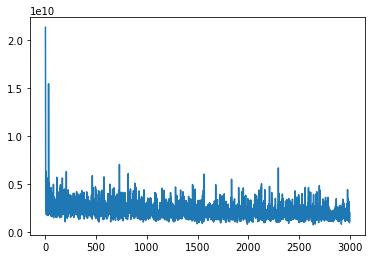

In [31]:
plt.figure()
plt.plot(losses)
plt.show()

In [32]:
model.eval()

with torch.no_grad():
    predictions = model(X_val.view(-1,n_features))
    print(predictions)

tensor([[146580.5938],
        [170112.3750],
        [155733.8125],
        ...,
        [168214.5000],
        [110510.3359],
        [199846.6875]])


In [33]:
for x, y in zip(predictions, y_val):
    print('Prediction: {0:.0f}, Actual: {1:.0f}'.format(float(x), y))

Prediction: 146581, Actual: nan
Prediction: 170112, Actual: nan
Prediction: 155734, Actual: nan
Prediction: 173045, Actual: nan
Prediction: 171940, Actual: nan
Prediction: 160798, Actual: nan
Prediction: 170967, Actual: nan
Prediction: 155163, Actual: nan
Prediction: 166507, Actual: nan
Prediction: 137722, Actual: nan
Prediction: 172089, Actual: nan
Prediction: 113650, Actual: nan
Prediction: 106858, Actual: nan
Prediction: 145094, Actual: nan
Prediction: 141189, Actual: nan
Prediction: 300353, Actual: nan
Prediction: 216745, Actual: nan
Prediction: 225495, Actual: nan
Prediction: 240883, Actual: nan
Prediction: 553117, Actual: nan
Prediction: 262839, Actual: nan
Prediction: 184519, Actual: nan
Prediction: 164911, Actual: nan
Prediction: 163915, Actual: nan
Prediction: 163176, Actual: nan
Prediction: 172901, Actual: nan
Prediction: 309600, Actual: nan
Prediction: 204174, Actual: nan
Prediction: 183282, Actual: nan
Prediction: 194894, Actual: nan
Prediction: 177440, Actual: nan
Predicti

Prediction: 139222, Actual: nan
Prediction: 143219, Actual: nan
Prediction: 156747, Actual: nan
Prediction: 159257, Actual: nan
Prediction: 127210, Actual: nan
Prediction: 143057, Actual: nan
Prediction: 122876, Actual: nan
Prediction: 155092, Actual: nan
Prediction: 119650, Actual: nan
Prediction: 149666, Actual: nan
Prediction: 133017, Actual: nan
Prediction: 139966, Actual: nan
Prediction: 140487, Actual: nan
Prediction: 130321, Actual: nan
Prediction: 143288, Actual: nan
Prediction: 139119, Actual: nan
Prediction: 144865, Actual: nan
Prediction: 122537, Actual: nan
Prediction: 145127, Actual: nan
Prediction: 98263, Actual: nan
Prediction: 111364, Actual: nan
Prediction: 157443, Actual: nan
Prediction: 223222, Actual: nan
Prediction: 145017, Actual: nan
Prediction: 98617, Actual: nan
Prediction: 162731, Actual: nan
Prediction: 118281, Actual: nan
Prediction: 145182, Actual: nan
Prediction: 124581, Actual: nan
Prediction: 144491, Actual: nan
Prediction: 144571, Actual: nan
Prediction

In [34]:
test_df['SalePrice'] = [float(p) for p in predictions]

In [35]:
submission = test_df.loc[:, ['Id', 'SalePrice']]

In [36]:
submission

,Id,SalePrice
0,1461,146580.593750
1,1462,170112.375000
2,1463,155733.812500
3,1464,173045.062500
4,1465,171940.265625
...,...,...
1454,2915,77844.648438
1455,2916,78397.328125
1456,2917,168214.500000
1457,2918,110510.335938


In [37]:
submission.to_csv('submission.csv', index=False)